## Machine Learning: Linear and Logistic Regression

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

## Preliminaries

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Analytical Solution

We compute for the optimal weights for our linear regression equation by getting the derivative of our objective function and equating it to 0. We arrive at an exact solution with this approach, however, there are some drawbacks, which we will see in the following cells.

The steps for doing the analytical / closed-form solution for linear regression are as follows:
1. **Add bias.** Adding $\theta_0$ in the weight vector $\theta$ and $x_0$ in $X$ to account for the bias term.
1. **Normal equation.** Finding for the optimal values of weight vector $\theta$ using the normal equation.
3. **Predict!** The predicted value can be solved by simply multiplying the input $x$ to our computed weights $\theta$.

### Synthetic Data

Let's create some synthetic data first which we will be training our model on.

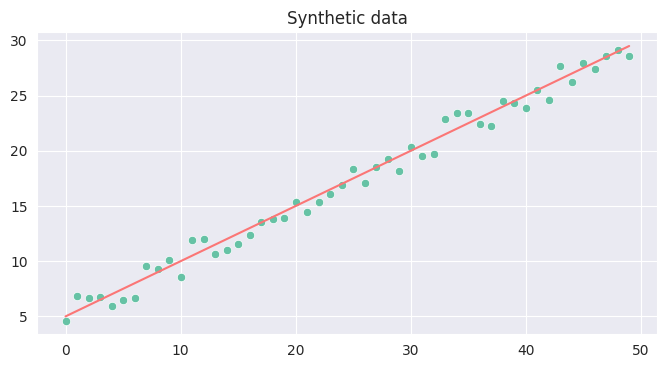

In [ ]:
np.random.seed(42)

n = 50
x = np.arange(n)
noise = (np.random.random(n) - 0.5) * 3
bias = 5
y = 0.5*x + bias + noise

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8,4))
sns.scatterplot(x=x, y=y, ax=ax)

plt.plot([0, n-1],[bias, x[-1]*0.5+bias], c='#fb7676')

plt.title('Synthetic data')
plt.show()

<!-- $h(x_i; \theta) = x_i^T \theta$

$h(x_i; \theta) = \theta^T x_i$ -->

<!-- $y = \theta^{T} X + b$  
$y X^{-1} = \theta^{T} X X^{-1}$  
$y X^{-1} = \theta^{T} I$  
$y X^{-1} = \theta^{T}$

<hr>

$y = X\theta^{T} + \epsilon$  
$\epsilon = y - X\theta^{T}$  
$y X^{-1} = \theta^{T} X X^{-1}$  
$y X^{-1} = \theta^{T} I$  
$y X^{-1} = \theta^{T}$

<hr> -->
### Ordinary Least Squares Proof 

1. Base Form

$$\vec{y} = X \vec{\theta} + \vec{\epsilon}$$
$$\vec{\epsilon} = \vec{y} - X \vec{\theta}$$      

> where:  
> $\vec{\epsilon} \in \mathbb{R}^{m} $ -- error.  
> $\vec{y} \in \mathbb{R}^{m} $ -- m x 1 column vector representation of outputs.  
> $X \in \mathbb{R}^{m,d}$ -- m x d matrix representation of inputs.  
> $\vec{\theta} \in \mathbb{R}^{d}$ -- d x 1 column vector representation of weights.  
> m -- number of samples.  
> d -- dimension or number of features + 1 (bias).

2. We get the sum of squared residuals. This also makes everything positive.

$$\vec{\epsilon}^{T}\vec{\epsilon} = (\vec{y} - X \vec{\theta})^{T}(\vec{y} - X \vec{\theta})$$
$$\vec{\epsilon}^{T}\vec{\epsilon} = (\vec{y}^{T} - \vec{\theta}^{T} X^{T})(\vec{y} - X \vec{\theta})$$
$$\vec{\epsilon}^{T}\vec{\epsilon} = \vec{y}^{T}\vec{y} - \vec{y}^{T} X \vec{\theta} - \vec{\theta}^{T} X^{T} \vec{y} + \vec{\theta}^{T} X^{T} X \vec{\theta}$$
$$\vec{\epsilon}^{T}\vec{\epsilon} = y^{T}y - 2 \vec{\theta}^{T} X^{T} \vec{y} + \vec{\theta}^{T} X^{T} X \vec{\theta}$$

> Note!  
> $ \vec{y}^{T} X \vec{\theta} = \vec{\theta}^{T} X^{T} \vec{y} $  
> $\hat{s} = \hat{s}^{T}$  
> since they're both scalars.  
> Dimensionality of $\vec{y}^{T} X \vec{\theta}$ : 1 x m x d x 1 = 1 x 1  
> Dimensionality of $\vec{\theta}^{T} X^{T} \vec{y}$ : 1 x d x m x 1 = 1 x 1  

3. Get derivative to optimize. See <a href="http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf">reference</a> for some commonly used matrix rules.

$$\dfrac { \partial{\vec{\epsilon}^{T}\vec{\epsilon}} } { \partial{\vec{\theta}} } = 0 - 2 X^{T} \vec{y} + 2 X^{T} X \vec{\theta} = 0$$
$$ X^{T} \vec{y} = X^{T} X \vec{\theta} $$
$$ ( X^{T} X )^{-1} X^{T} \vec{y} = ( X^{T} X )^{-1} ( X^{T} X ) \vec{\theta} $$
$$ ( X^{T} X )^{-1} X^{T} \vec{y} = \vec{\theta} $$

<!-- Row vector:  
$ \theta^{T} = { -2 y X } ( X^{T} X )^{-1} $  

Column vector:  
$ \theta = -2 ( X^{T} X )^{-1} { X^{T} y }  $   -->

4. Final equation.
  
$$\vec{\theta} = (X^{T}X)^{-1}X^{T}\vec{y}$$

### Analytical solution caveats

While the analytical solution gives us the optimal parameters (assuming linear relationship) to a problem, it requires performing the calculation of the inverse of a matrix $X^TX$, which approximately has a time complexity of $O(n^3)$. For smaller datasets, this might not cause issues, but for datasets containing hundreds of dimensions and millions of rows, this will take quite some time to compute. 

Another way to solve for the parameters is through numerical approximation using gradient descent which we will implement later.

### Exercise: Implement Ordinary Least Squares

Let's implement ordinary least squares from scratch!

In [ ]:
from numpy.testing import assert_almost_equal

class OLS():
  def fit(self, X, y):
    b = np.ones(X.shape[0]).reshape(-1,1) # prepare bias vector
    X = np.concatenate([b, X], axis=1) # add bias vector to our input matrix
    # insert code here
    # hint! use np.linalg.pinv
    theta = ... # normal equation / OLS
    # insert code here
    self.theta = theta # save weights
    return theta
  
  def predict(self, X):
    b = np.ones(X.shape[0]).reshape(-1,1) # prepare bias vector
    X = np.concatenate([b, X], axis=1) # add bias vector to our input matrix
    # insert code here
    y = ... # compute predicted value
    # insert code here
    return y

  @staticmethod
  def r_squared(y_true:np.array, y_pred:np.array) -> float:
    '''
    Returns the score using R-squared metric.
    '''
    u = ((y_true - y_pred) ** 2).sum() # sum of squared residuals
    v = ((y_true - y_true.mean()) ** 2).sum() # sum of squared diff from the mean
    score = 1 - (u/v)
    return score

  def score(self, X, y) -> float:
    y_pred = self.predict(X)
    return self.r_squared(y, y_pred)

ols = OLS()
theta = ols.fit(x.reshape(-1,1), y)
assert_almost_equal(list(theta), [4.92695806, 0.49635974])
print('Passed test!')
print(f'Linear Regression weights: {theta}')

Passed test!
Linear Regression weights: [4.92695806 0.49635974]


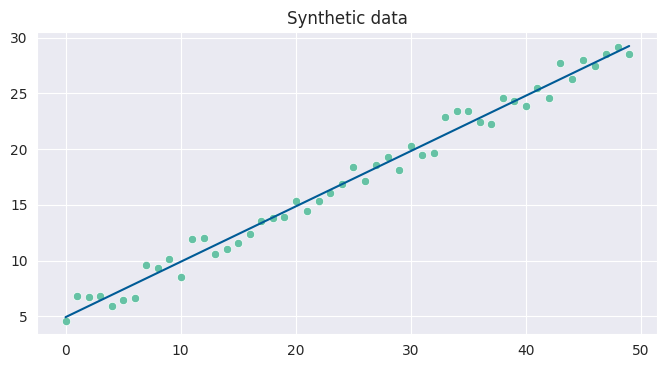

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8,4))
sns.scatterplot(x=x, y=y, ax=ax)

# plt.plot([0, n-1],[bias, x[-1]*0.5+bias], c='#fb7676')
plt.plot([0, n-1],[theta[0], x[-1]*theta[1]+theta[0]], c='#005b96')

plt.title('Synthetic data')
plt.show()


### Exercise Solution

See solution for the exercise above in the cell under this section.




```python
theta = np.linalg.pinv(np.dot(X.T, X)) @ X.T @ y.T # normal equation / OLS
...
y = X @ self.theta # compute predicted value
```

### Boston House Prices Dataset

Now let's use a real-world dataset. In the following examples, we'll be using the Boston house prices dataset as it is a regression type of dataset.

In [ ]:
print(datasets.load_boston(return_X_y=False)['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


#### Modeling

We model the dataset using our own linear regression implementation.

In [ ]:
ols = OLS()
theta = ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)
score = ols.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Test Set Score: 66.88%


#### Visualize Results

We visualize the actual and predicted values with respect to `LSTAT` feature.

In [ ]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.load_boston()['feature_names'].tolist() + ['target']
df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18


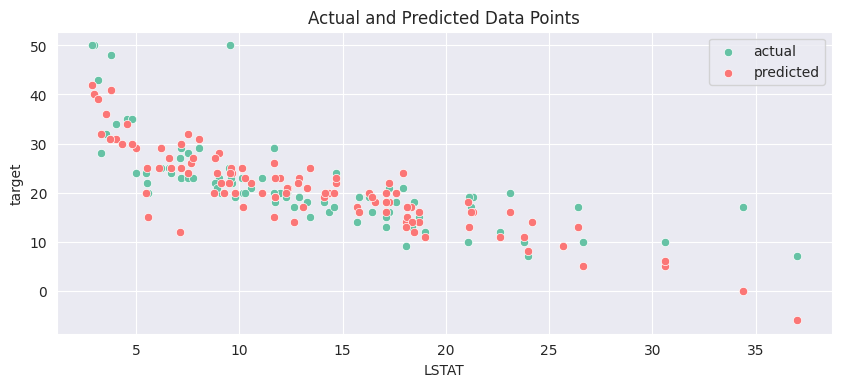

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,4), dpi=100)

pred_set = np.concatenate((X_test, np.array(y_pred).reshape(-1,1)), axis=1)
df_pred = pd.DataFrame(pred_set, columns=columns)
df_pred['target'] = df_pred['target'].astype(int)

sns.scatterplot(data=df_test, x='LSTAT', y='target', label='actual', palette="Set2", ax=ax1)
sns.scatterplot(data=df_pred, x='LSTAT', y='target', color='#fb7676', label='predicted', palette="Set2", ax=ax1)

ax1.set_title('Actual and Predicted Data Points')
plt.show()

## Sklearn's Linear Regression

Sklearn's built-in linear regression library uses OLS, which is the analytical solution we did earlier. For more details, refer to <a href ="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn's documentation</a>


We turn the generation of synthetic data we have done earlier into a function...

In [ ]:
def gen_synthetic_data():
  np.random.seed(42)

  n = 50
  x = np.arange(n)
  noise = (np.random.random(n) - 0.5) * 3
  bias = 5
  y = 0.5*x + bias + noise

  return x, y

Let's start modeling

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = gen_synthetic_data()
X = X.reshape(-1,1) # reshape the data since the library expects a 2d array
reg = LinearRegression() # instantiate the model
reg.fit(X, y) # train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here are the weights of our linear regression model.

In [ ]:
reg.intercept_, reg.coef_

(4.92695805810644, array([0.49635974]))

Note that earlier, we got the following weights using our own implementation of OLS:

`[4.92695806 0.49635974]`

In [ ]:
y_pred = reg.predict(X)
score = r2_score(y, y_pred)
print(f"Score: {score:.2%}")

Score: 98.59%


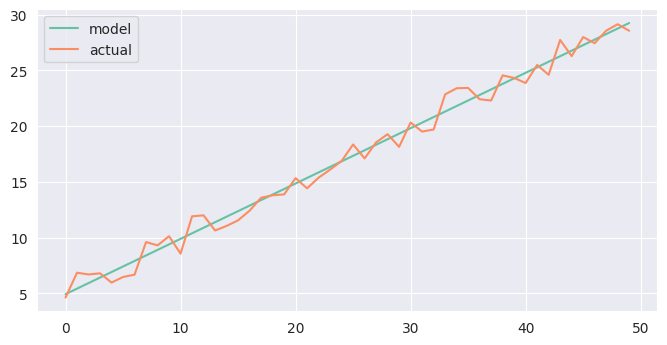

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4), dpi=100)

y_pred = reg.predict(X)

ax1.plot(X, y_pred, label='model')
ax1.plot(X, y, label='actual')
# ax1.hist(y- y_pred);
# plt.title('Error distribution')

plt.legend()
plt.show()

What if we want to predict a new data point?

Input: [[60]] | Output: [34.70854252]


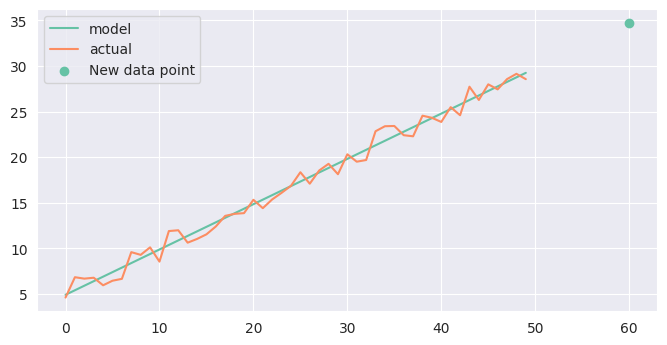

In [ ]:
new_point = np.array([[60]])
new_point_pred = reg.predict(new_point)

print(f'Input: {new_point} | Output: {new_point_pred}')

fig, (ax1) = plt.subplots(1, 1, figsize=(8,4), dpi=100)

y_pred = reg.predict(X)

ax1.plot(X, y_pred, label='model')
ax1.plot(X, y, label='actual')
ax1.scatter(new_point, new_point_pred, label='New data point')

plt.legend()
plt.show()

What if we model using Boston dataset?

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression() # instantiate the model
reg.fit(X_train, y_train) # train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
score = ols.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Test Set Score: 66.88%


This is the same score we got earlier.

In [ ]:
ols = OLS()
theta = ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)
y_pred_sklearn = reg.predict(X_test)

assert_almost_equal(y_pred, y_pred_sklearn)
print('Sklearn matches our implementation!') # if this prints, then we got it right!

Sklearn matches our implementation!


## Numerical Approximation: Gradient Descent

As mentioned earlier, we can also approximate the weights through gradient descent. The next cells show the proof for getting the formulae for the loss function, gradient, and weight update rules for the gradient descent solution of linear regression.


### **Loss function**

We start with this equation again.

<!-- $$\boldsymbol{y} = \boldsymbol{X} \theta + \epsilon$$ -->
$$\vec{y} = X \vec{\theta} + \vec{\epsilon}$$
$$\vec{\epsilon} = \vec{y} - X \vec{\theta}$$

> To make things concise, let $\hat{y} = X \vec{\theta}$

<!-- Our hypothesis function is:
$$h(X,\theta) = X \theta = \hat{y} $$ -->

After that, we will also be getting the sum of squared errors, similar to the analytical solution:
$$\vec{\epsilon}^T \vec{\epsilon} = (\vec{y}-\hat{y})^T(\vec{y}-\hat{y})$$

This could be rewritten as:

$$\epsilon_i^2 = \sum_i{(y_i - \hat{y}_i)^2}$$

We will also be adding a normalization value of $\frac{1}{2n}$. This is to get the mean (instead of just the sum) so the error value will be rescaled based on the number of samples. In addition, there's a constant value of 2 to cancel out the same constant value which will arise once we get the derivate of the cost/loss function.

$$\epsilon_i^2 = \frac{1}{2n} \sum_i{(y_i - \hat{y}_i)^2}$$

This will now be our loss function:

$$l(\vec{\theta}) = \frac{1}{2n} \sum_i{(y_i - \hat{y}_i)^2}$$
$$l(\vec{\theta}) = \frac{1}{2n} \sum_i{(y_i - \vec{x}_i \vec{\theta})}^2$$

> Note that $x_i$ is $i$th row vector in $X$. 

We will be optimizing our model based on this loss/cost function.



### **Weight Update: Computing the gradients via Calculus**

We want to get the best possible $\theta$ that will minimize our cost function. We do this by starting at some random $\theta$ value and iteratively adjusting the $\theta$ by getting the derivative and subtracting it with the current value. This is the gradient descent. The equation for that is as follows:

$$\vec{\theta} := \vec{\theta} - \alpha \dfrac{\partial}{\partial \vec{\theta} } l( \vec{\theta} )$$

> $\alpha$ is the learning constant. This governs how fast we move down the slope.

Let's solve for the derivative of our cost function.

$$\dfrac{\partial}{\partial\theta_j} l( \vec{\theta} ) = \frac{2}{2n}\sum_i^n(y_i - \vec{x}_{i} \vec{\theta}) \dfrac{\partial}{\partial\theta_j}(y_i-x_{ij}\theta_j)$$
$$\dfrac{\partial}{\partial\theta_j} l(\vec{\theta}) = - \frac{1}{n}\sum_i^n(y_i - \vec{x}_{i} \vec{\theta}) x_{ij}$$

> **Note that** $$\vec{x}_i = \vec{x}_{i0} + \vec{x}_{i1} + ... + \vec{x}_{im}$$
> $$\vec{\theta} = \theta_0 + \theta_1 + ... + \theta_m$$

Put it back in the original equation:

$$\theta_j := \theta_j + \alpha \frac{1}{n}\sum_i^n(y_i - \vec{x}_{i} \vec{\theta}) x_{ij}$$

We can rewrite it as vectors/matrices:
$$\theta_j := \theta_j + \frac{\alpha}{n}(\vec{y} - X \vec{\theta})^T \vec{x}_{j}$$

And if we reverse the $y$ and $\hat{y}$:

$$\theta_j := \theta_j - \frac{\alpha}{n}(X \vec{\theta} - \vec{y})^T \vec{x}_{j}$$

This is the more common equation you will see. We'll end up with the same result either way. It's just that I started with reversed one so I stuck with it.

Let's also write down the concise notation for all the weight update rule in one line.

$$\dfrac{\partial}{\partial \vec{\theta} } l( \vec{\theta} ) = \frac{1}{n} (X \vec{\theta} - \vec{y})^T X$$
$$\vec{\theta} := \vec{\theta} - \alpha \dfrac{\partial}{\partial \vec{\theta}} l( \vec{\theta} )$$
$$\vec{\theta} := \vec{\theta} - \frac{\alpha}{n}(X \vec{\theta} - \vec{y})^T X$$

<!-- $$\theta := \theta + \alpha \frac{1}{n}\Sigma_i^n(y_i-x_{ij}\theta_j) x_i^T$$ -->

To be consistent, we will also rewrite our loss function in vector/matrix notation:
$$l(\vec{\theta}) = \frac{1}{2n} (X \vec{\theta} - \vec{y})^T(X \vec{\theta} - \vec{y})$$

### **Summary**

Loss function:
$$l(\vec{\theta}) = \frac{1}{2n} (X \vec{\theta} - \vec{y})^T(X \vec{\theta} - \vec{y})$$
---
Gradient function:
$$\dfrac{\partial}{\partial \vec{\theta} } l( \vec{\theta} ) = \frac{1}{n} (X \vec{\theta} - \vec{y})^T X$$
---
Weight update rule:
$$\vec{\theta} := \vec{\theta} - \frac{\alpha}{n}(X \vec{\theta} - \vec{y})^T X$$
---

The **Gradient Descent algorithm** is as follows:

- Initialize starting weights.
- While not coverging (change in loss is too small or exceeded max. number of iterations)
 - compute loss
 - compute gradient
 - update weights

**Implementing this will be your homework :)**

There are more nuances in sklearn's stochastic gradient descent implementation for linear regression. We won't be doing that. For now, we will only be doing this vanilla case.

## Logistic Regression

Logistic regression is simply the classification version of linear regression. To turn linear regression into logistic regression, we just need to do a slight modification in the hypothesis function.

|<h3>Linear Regresssion</h3> | <h3>Logistic Regression</h3>|
|--|--|
|<h4>$$\hat{y}_i = score = \vec{\theta}^T \vec{x}_i$$</h4> | <h4>$$\hat{y}_i = \sigma(score) = \sigma (\vec{\theta}^T \vec{x}_i)$$</h4>|

> <h5>Note that: $\sigma(x) = \dfrac{1}{e^{-x}+1}$</h5>

Then our loss function (in log-loss form) becomes:

<!-- $$argmin_{\theta}\ \ell(\theta) = -log \ L(\theta) = $$ -->
<h4>$$\ell(\vec{\theta}) = -log \ L(\vec{\theta}) = -\sum_i^n [y_i log(\sigma (\vec{\theta}^T \vec{x}_i)) + (1-y_i) log(1-\sigma (\vec{\theta}^T \vec{x}_i))]$$</h4>

Our gradient function is:
<h4>$$\frac{\partial}{\partial \theta_j} \ell(\vec{\theta}) = (h_{\theta}(X) - \vec{y})\vec{x}_j$$</h4>

> <h5>Note that $x_j$ is a column vector of samples for feature $j$ in input matrix $X$.</h5>

We can rewrite this into vector form to make computations faster.

<h4>$$\frac{\partial}{\partial \vec{\theta}} \ell(\vec{\theta}) = X^T(h_{\theta}(X) - \vec{y})$$</h4>

And, finally, our weight update rule is:
<h4>$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} \ell(\vec{\theta})$$</h4>
<h4>$$\vec{\theta} := \vec{\theta} - \alpha \frac{\partial}{\partial \vec{\theta}} \ell(\vec{\theta})$$</h4>

### Sklearn's Logistic Regression

Since there is no analytical solution for logistic regression, Sklearn's built-in implementation uses gradient descent. For more details, refer to <a href ="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn's documentation</a>


In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = clf.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Train Set Score: 97.50%
Test Set Score: 100.00%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As you can see, the model has not converged immediately and has exceeded the default maximum number of iterations, which is 100 in sklearn. Still, we got very high accuracies for both train and test sets.

Regularization helps avoid overfitting by making the weights small--our model won't give too much preference on a certain weight. By default, we use 'l2' penalty for regularization. We can remove that. Let's see what will happen.

In [ ]:
LogisticRegression(max_iter=200)

In [ ]:
clf = LogisticRegression(penalty='none')
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = clf.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Train Set Score: 98.33%
Test Set Score: 100.00%


In this case, no regularization improved train set scores. 

We can also give more importance to the regularization strength by configuring `C` constant value. Lower `C` value = stronger regularization. 

In [ ]:
clf = LogisticRegression(C=0.01)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print(f'Train Set Score: {score:.2%}')
score = clf.score(X_test, y_test)
print(f'Test Set Score: {score:.2%}')

Train Set Score: 87.50%
Test Set Score: 93.33%


## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href>> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
